In [29]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
res_dir = 'full_test_results_csv'
words2ignore = ['toy', 'sonar', 'spam']

In [33]:
ds_resfiles = {}

for ds in os.listdir(res_dir):
    if not os.path.isfile(os.path.join(res_dir, ds)):
        continue
        
    found = False
    for word in words2ignore:
        if word in ds:
            found = True
    
    if not found:
        ds_name = ds.replace('_results.csv', '').capitalize().replace('_', ' ')
        ds_df = pd.read_csv(os.path.join(res_dir, ds)).rename({"LGBM": 'Light GBM', "LGBM std": "Light GBM std"}, axis=1)
        ds_resfiles[ds_name] = ds_df
        
ds_resfiles.keys(), len(ds_resfiles.keys())

(dict_keys(['Parkinson', 'Ecoli', 'Climate', 'Accent', 'Wifi', 'Rmftsa ctoarrivals', 'Breast', 'Analcatdata germangss', 'Credit g', 'Analcatdata vineyard', 'Banknote', 'Arsenic male bladder', 'Tokyo', 'Credit approval', 'Diabetes', 'Wine', 'Iris', 'Blood transfusion']),
 18)

In [34]:
ds_resfiles['Accent']

,n_feats_to_train_with,XGBoost,Random Forsest,AdaBoost,Light GBM,Vanilla NN,NN with regularization,KNN,Random Forest,XGBoost std,Random Forest std,AdaBoost std,Light GBM std,Vanilla NN std,NN with regularization std,KNN std
0,12,0.727273,NaN,0.575758,0.803030,0.651515,0.787879,0.757576,0.787879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11,0.702020,NaN,0.554293,0.786616,0.646465,0.742424,0.752525,0.779040,0.063784,0.021833,0.047294,0.027286,0.020824,0.036068,0.027198
2,10,0.654293,NaN,0.531818,0.757071,0.631061,0.707071,0.741919,0.755808,0.080293,0.028760,0.064384,0.034213,0.031275,0.045258,0.040840
3,9,0.592677,NaN,0.512121,0.734091,0.615152,0.681061,0.720202,0.722222,0.107248,0.036244,0.071002,0.036743,0.035447,0.049207,0.041260
4,8,0.541919,NaN,0.511111,0.706566,0.592172,0.666667,0.708333,0.701515,0.094312,0.042523,0.069591,0.037926,0.046230,0.047189,0.045085
5,7,0.487121,NaN,0.489899,0.678030,0.573990,0.642172,0.682323,0.662879,0.129331,0.043793,0.077538,0.040620,0.050562,0.053361,0.058483
6,6,0.437626,NaN,0.477273,0.640404,0.542424,0.611869,0.643182,0.632828,0.133330,0.050051,0.076586,0.049629,0.061471,0.053217,0.058579
7,5,0.378030,NaN,0.481313,0.598485,0.549495,0.577525,0.597980,0.594949,0.128280,0.048459,0.067667,0.055360,0.044076,0.059207,0.064666
8,4,0.286616,NaN,0.465404,0.524242,0.502273,0.561869,0.555303,0.562879,0.142974,0.050919,0.069107,0.062850,0.061659,0.042342,0.062461
9,3,0.236616,NaN,0.485354,0.460101,0.494697,0.532071,0.496717,0.526515,0.140430,0.056734,0.060033,0.073552,0.050542,0.044954,0.060041


In [42]:
xgb_res = {k: np.array(list(zip(v['XGBoost'].values, v['XGBoost std']))) for k, v in ds_resfiles.items()}
lgbm_res = {k: np.array(list(zip(v['Light GBM'].values, v['Light GBM std']))) for k, v in ds_resfiles.items()}
rf_res = {k: np.array(list(zip(v['Random Forest'].values, v['Random Forest std']))) for k, v in ds_resfiles.items()}
ada_res = {k: np.array(list(zip(v['AdaBoost'].values, v['AdaBoost std']))) for k, v in ds_resfiles.items()}
vanilla_nn_res = {k: np.array(list(zip(v['Vanilla NN'].values, v['Vanilla NN std']))) for k, v in ds_resfiles.items()}
nn_with_regularization_res = {k: np.array(list(zip(v['NN with regularization'].values, v['NN with regularization std']))) for k, v in ds_resfiles.items()}
knn_res = {k: np.array(list(zip(v['KNN'].values, v['KNN std']))) for k, v in ds_resfiles.items()}


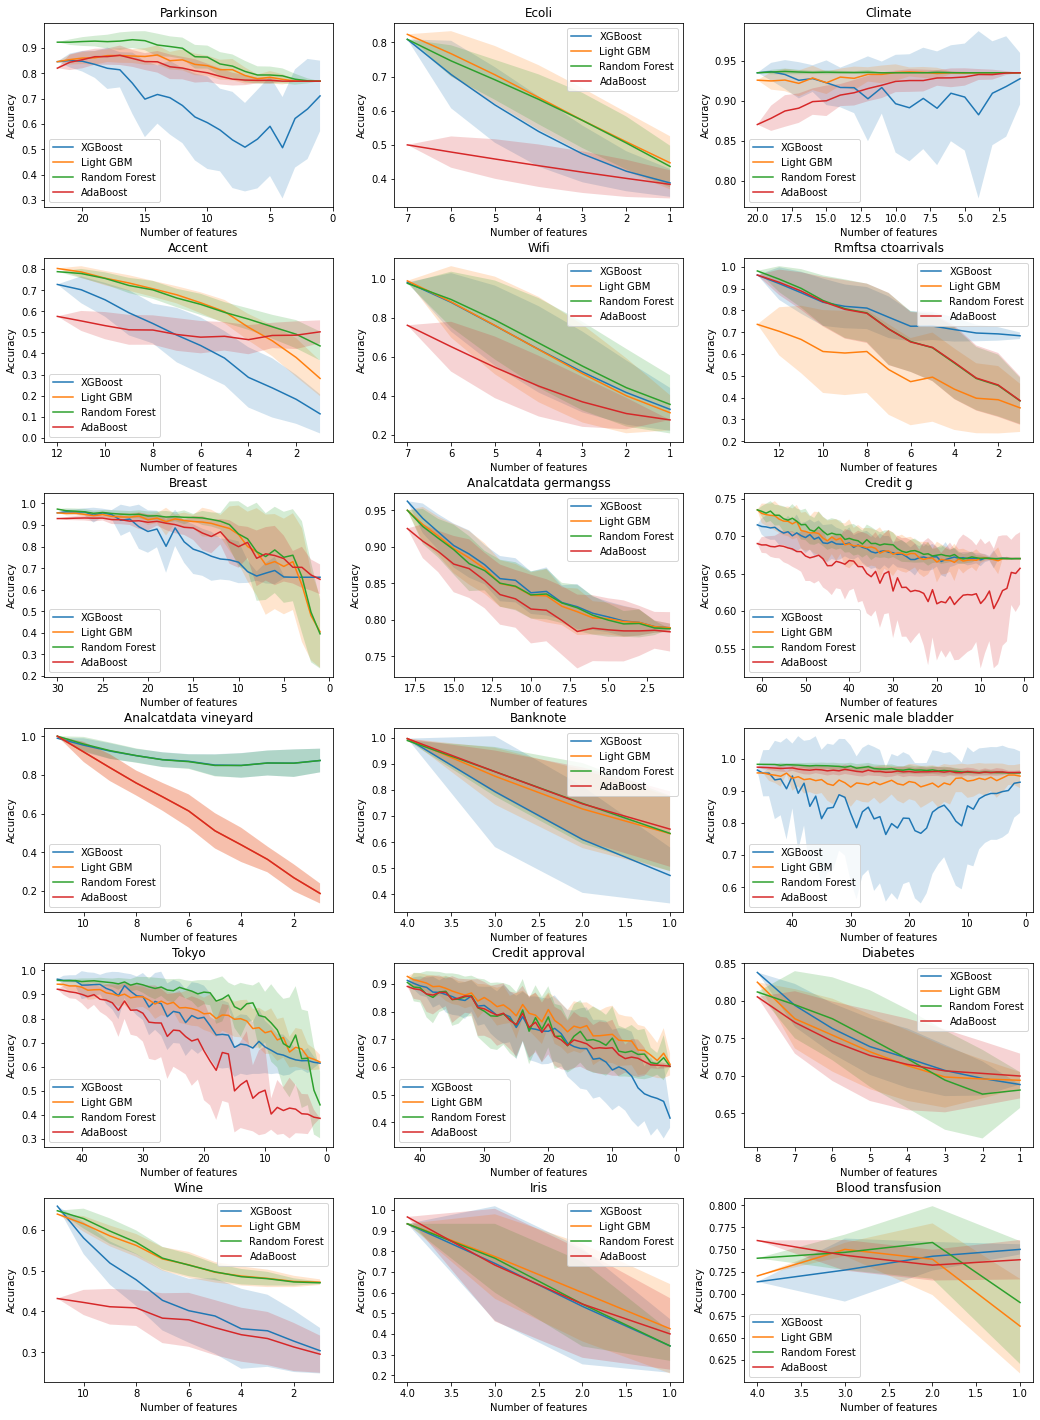

In [41]:
# create a 6x3 grid of subplots for each dataset, each subplot will contain 4 lines of "n_feats_to_train_with" vs model with reversed x-axis

fig, axs = plt.subplots(6, 3, figsize=(15, 20))
fig.tight_layout(pad=3.0)
GRAPE

for i in range(6):
    for j in range(3):
        ds_name = list(ds_resfiles.keys())[i*3 + j]
        n_feats = ds_resfiles[ds_name]['n_feats_to_train_with'].values
        axs[i, j].plot(n_feats, xgb_res[ds_name][:, 0], label='XGBoost')
        axs[i, j].fill_between(n_feats, xgb_res[ds_name][:, 0] - xgb_res[ds_name][:, 1], xgb_res[ds_name][:, 0] + xgb_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, lgbm_res[ds_name][:, 0], label='Light GBM')
        axs[i,j].fill_between(n_feats, lgbm_res[ds_name][:, 0] - lgbm_res[ds_name][:, 1], lgbm_res[ds_name][:, 0] + lgbm_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, rf_res[ds_name][:, 0], label='Random Forest')
        axs[i,j].fill_between(n_feats, rf_res[ds_name][:, 0] - rf_res[ds_name][:, 1], rf_res[ds_name][:, 0] + rf_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, ada_res[ds_name][:, 0], label='AdaBoost')
        axs[i,j].fill_between(n_feats, ada_res[ds_name][:, 0] - ada_res[ds_name][:, 1], ada_res[ds_name][:, 0] + ada_res[ds_name][:, 1], alpha=0.2)
        
        # reverse x-axis
        axs[i, j].set_xlim(axs[i, j].get_xlim()[::-1])
        
        axs[i, j].set_title(ds_name)
        axs[i, j].set_xlabel('Number of features')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].legend()
        
plt.savefig('full_test_results_ensemble.pdf')

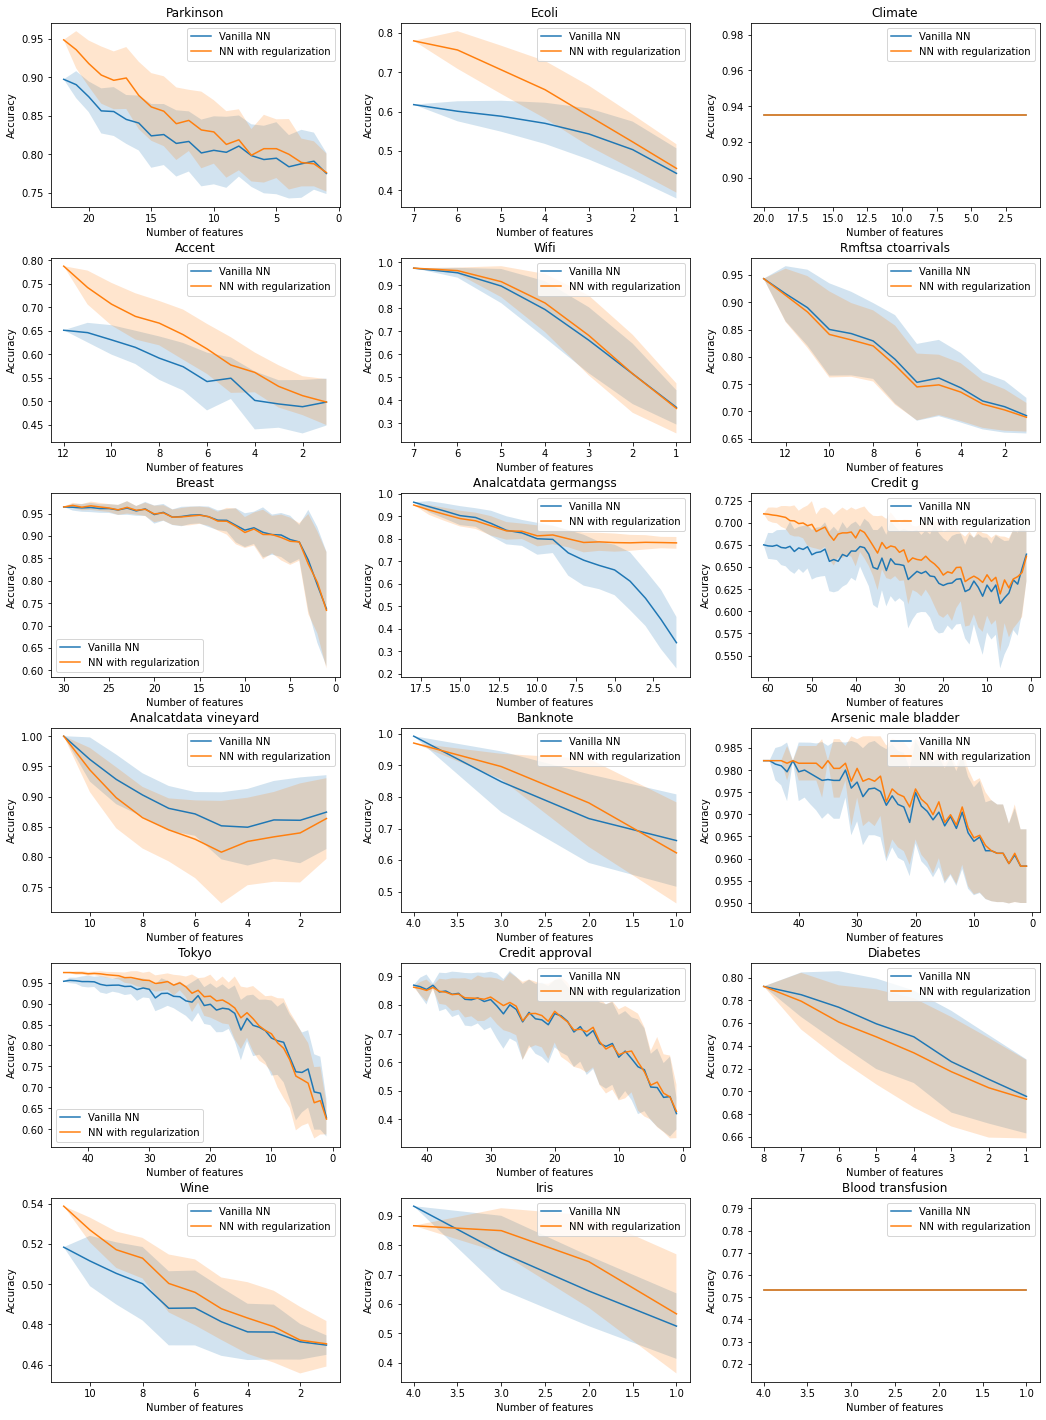

In [43]:
# run the same for vanilla NN and NN with regularization

fig, axs = plt.subplots(6, 3, figsize=(15, 20))
fig.tight_layout(pad=3.0)

for i in range(6):
    for j in range(3):
        ds_name = list(ds_resfiles.keys())[i*3 + j]
        n_feats = ds_resfiles[ds_name]['n_feats_to_train_with'].values
        axs[i, j].plot(n_feats, vanilla_nn_res[ds_name][:, 0], label='Vanilla NN')
        axs[i,j].fill_between(n_feats, vanilla_nn_res[ds_name][:, 0] - vanilla_nn_res[ds_name][:, 1], vanilla_nn_res[ds_name][:, 0] + vanilla_nn_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, nn_with_regularization_res[ds_name][:, 0], label='NN with regularization')
        axs[i,j].fill_between(n_feats, nn_with_regularization_res[ds_name][:, 0] - nn_with_regularization_res[ds_name][:, 1], nn_with_regularization_res[ds_name][:, 0] + nn_with_regularization_res[ds_name][:, 1], alpha=0.2)
        
        # reverse x-axis
        axs[i, j].set_xlim(axs[i, j].get_xlim()[::-1])
        
        axs[i, j].set_title(ds_name)
        axs[i, j].set_xlabel('Number of features')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].legend()
        
plt.savefig('full_test_results_nn.pdf')

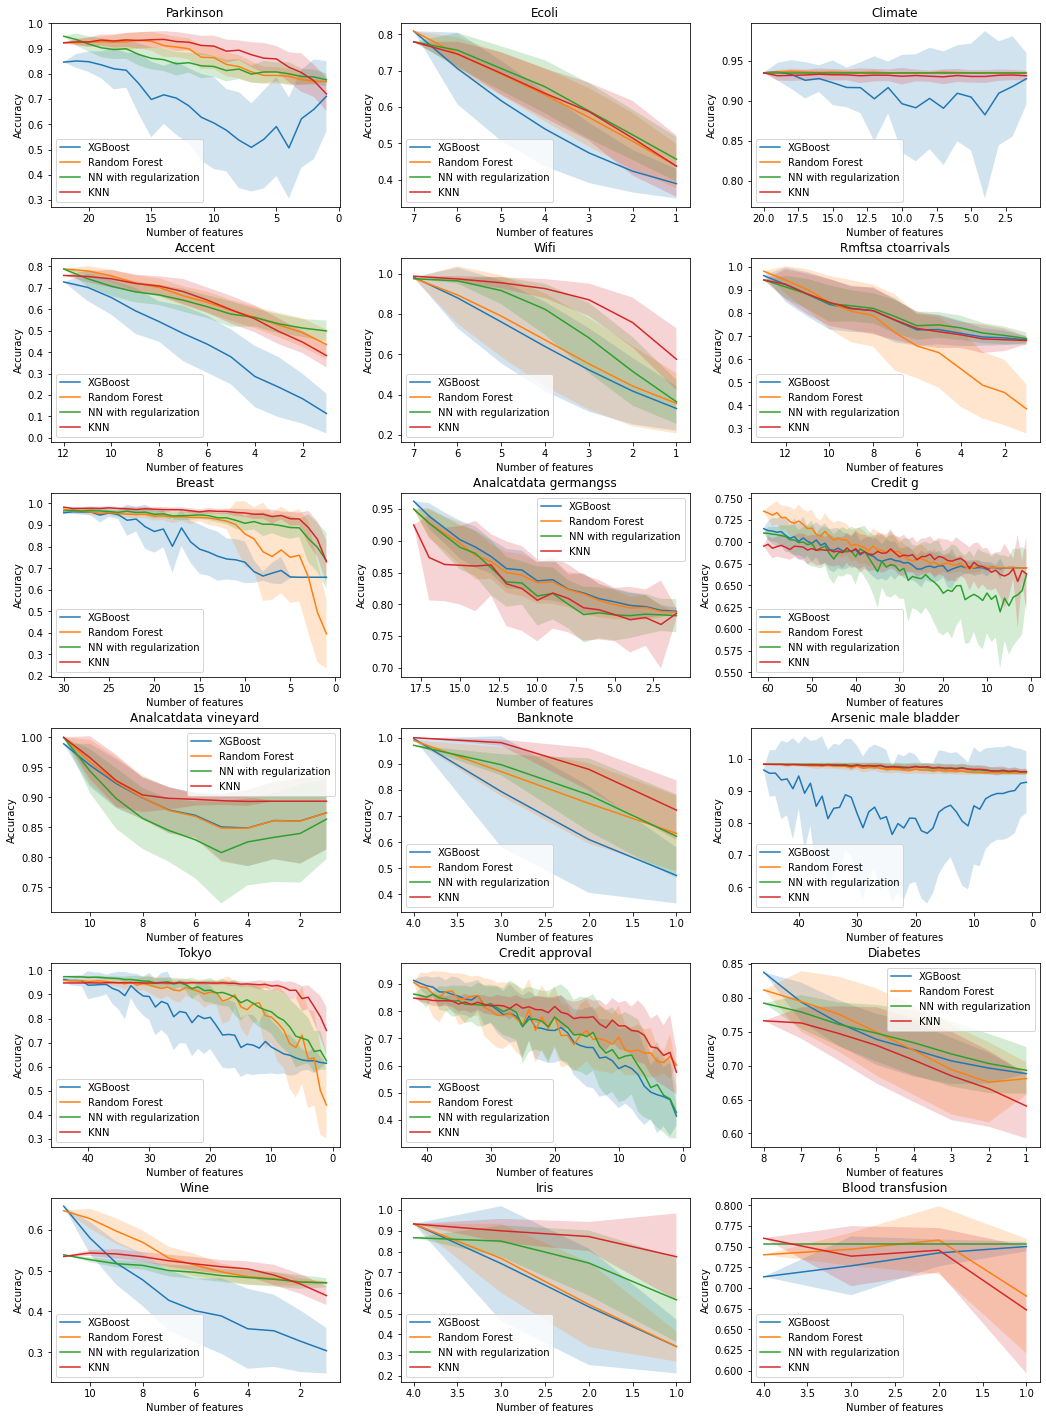

In [45]:
# run the same for the main models: XGBoost, Random Forest, KNN, NN with regularization

fig, axs = plt.subplots(6, 3, figsize=(15, 20))
fig.tight_layout(pad=3.0)

for i in range(6):
    for j in range(3):
        ds_name = list(ds_resfiles.keys())[i*3 + j]
        n_feats = ds_resfiles[ds_name]['n_feats_to_train_with'].values
        axs[i, j].plot(n_feats, xgb_res[ds_name][:, 0], label='XGBoost')
        axs[i, j].fill_between(n_feats, xgb_res[ds_name][:, 0] - xgb_res[ds_name][:, 1], xgb_res[ds_name][:, 0] + xgb_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, rf_res[ds_name][:, 0], label='Random Forest')
        axs[i,j].fill_between(n_feats, rf_res[ds_name][:, 0] - rf_res[ds_name][:, 1], rf_res[ds_name][:, 0] + rf_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, nn_with_regularization_res[ds_name][:, 0], label='NN with regularization')
        axs[i,j].fill_between(n_feats, nn_with_regularization_res[ds_name][:, 0] - nn_with_regularization_res[ds_name][:, 1], nn_with_regularization_res[ds_name][:, 0] + nn_with_regularization_res[ds_name][:, 1], alpha=0.2)
        axs[i, j].plot(n_feats, knn_res[ds_name][:, 0], label='KNN')
        axs[i,j].fill_between(n_feats, knn_res[ds_name][:, 0] - knn_res[ds_name][:, 1], knn_res[ds_name][:, 0] + knn_res[ds_name][:, 1], alpha=0.2)
        
        # reverse x-axis
        axs[i, j].set_xlim(axs[i, j].get_xlim()[::-1])
        
        axs[i, j].set_title(ds_name)
        axs[i, j].set_xlabel('Number of features')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].legend()
        
plt.savefig('full_test_results_main_models.pdf')